In [1]:
import json

In [2]:
import pandas as pd

In [3]:
df_ratings= pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz',sep='\t')

In [4]:
df_titles= pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz',sep='\t')

/Users/diegoguiraldes/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df=df_titles.merge(df_ratings)

In [6]:
df['pond']=df['averageRating']*df['numVotes']

In [7]:
df[df['averageRating']>8].sort_values(by='pond',ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,pond
82505,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2568531,23887338.3
251023,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.1,2533260,23052666.0
629040,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2254235,19837268.0
434958,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,57,"Action,Adventure,Drama",9.3,1969938,18320423.4
99117,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2021108,17785750.4
...,...,...,...,...,...,...,...,...,...,...,...,...
912199,tt3472758,tvEpisode,Saucerful of Secrets/Lights Out,Saucerful of Secrets/Lights Out,0,2014,\N,\N,Action,8.2,5,41.0
1213742,tt9348206,movie,Längs Helsingegatan,Längs Helsingegatan,0,2013,\N,59,"Documentary,History",8.2,5,41.0
1170006,tt8203882,short,The Pressure Point,The Pressure Point,0,2017,\N,20,"Crime,Drama,Short",8.2,5,41.0
1142887,tt7563090,tvEpisode,WIND International Film Festival Awards Show a...,WIND International Film Festival Awards Show a...,0,2017,\N,\N,"News,Talk-Show",8.2,5,41.0


In [19]:
df_sw=df[(df['titleType']=='movie') & (df['primaryTitle'].str.contains('Star Wars'))].sort_values(by='startYear')

In [28]:
df_sw[(df_sw['genres'].str.contains('Documentary')==False) & (df_sw['genres'].str.contains('Comedy')==False) & (df_sw['numVotes']>600)][['primaryTitle','startYear','runtimeMinutes','averageRating']]

,primaryTitle,startYear,runtimeMinutes,averageRating
53202,Star Wars,1977,121,8.6
56608,Star Wars: Episode V - The Empire Strikes Back,1980,124,8.7
61325,Star Wars: Episode VI - Return of the Jedi,1983,131,8.3
90433,Star Wars: Episode I - The Phantom Menace,1999,136,6.5
90888,Star Wars: Episode II - Attack of the Clones,2002,142,6.6
90889,Star Wars: Episode III - Revenge of the Sith,2005,140,7.6
544324,Star Wars: The Clone Wars,2008,98,5.9
847385,Star Wars: Episode VII - The Force Awakens,2015,138,7.9
931553,Rogue One: A Star Wars Story,2016,133,7.8
850318,Star Wars: Episode VIII - The Last Jedi,2017,152,6.9


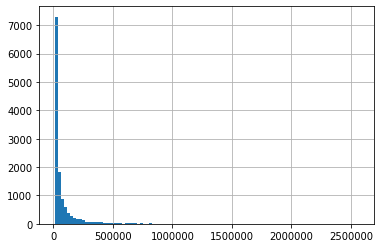

In [37]:
df[df['numVotes']>10000]['numVotes'].hist(bins=100)

In [39]:
df[df['numVotes']>1000].describe()

,averageRating,numVotes,pond
count,72545.000000,7.254500e+04,7.254500e+04
mean,6.983948,1.566050e+04,1.134774e+05
std,1.349845,6.718480e+04,5.388414e+05
min,1.000000,1.001000e+03,1.106600e+03
25%,6.200000,1.492000e+03,1.027500e+04
50%,7.100000,2.527000e+03,1.775360e+04
75%,8.000000,5.963000e+03,4.176560e+04
max,10.000000,2.568531e+06,2.388734e+07


In [40]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,pond
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1869,10653.3
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.9,247,1457.3
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1645,10692.5
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.8,159,922.2
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2471,15320.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1230628,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Adventure,Animation,Comedy",6.6,5,33.0
1230629,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",5.7,202,1151.4
1230630,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N,8.7,6,52.2
1230631,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",6.7,19,127.3


In [41]:
df_rats=pd.read_csv('ratings.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd51acbd110>,
      dtype=object)

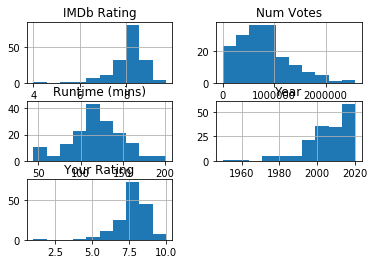

In [46]:
df_rats.hist()

In [62]:
cats=df_rats['Genres'].str.get_dummies(sep=',')

In [61]:
from sklearn.manifold import TSNE

In [64]:
X_embedded = TSNE(n_components=2).fit_transform(cats)

In [71]:
df_tsne=pd.DataFrame(X_embedded,columns=['tsne_1','tsne_2'])

In [73]:
df_plot=pd.concat([df_rats,df_tsne],1)

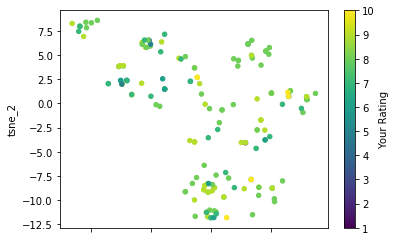

In [76]:
df_plot.plot.scatter(x='tsne_1',y='tsne_2',c='Your Rating',colormap='viridis')

In [79]:
df_plot[df_plot['tsne_2']>5]

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,tsne_1,tsne_2
1,tt1049413,8,2016-02-18,Up,https://www.imdb.com/title/tt1049413/,movie,8.3,96,2009,"Animation, Adventure, Comedy, Drama, Family",1008201,2009-05-13,"Pete Docter, Bob Peterson",-9.943035,8.330305
5,tt0108052,8,2014-05-20,Schindler's List,https://www.imdb.com/title/tt0108052/,movie,9.0,195,1993,"Biography, Drama, History",1309088,1993-11-30,Steven Spielberg,3.119159,6.138767
7,tt0110357,8,2016-12-01,The Lion King,https://www.imdb.com/title/tt0110357/,movie,8.5,88,1994,"Animation, Adventure, Drama, Family, Musical",1017751,1994-06-12,"Rob Minkoff, Roger Allers",-9.449675,8.587392
11,tt0112573,8,2016-12-01,Braveheart,https://www.imdb.com/title/tt0112573/,movie,8.4,178,1995,"Biography, Drama, History, War",1012698,1995-05-18,Mel Gibson,3.426940,6.516253
16,tt0114709,8,2017-12-05,Toy Story,https://www.imdb.com/title/tt0114709/,movie,8.3,81,1995,"Animation, Adventure, Comedy, Family, Fantasy",957753,1995-11-19,John Lasseter,-10.904782,7.973699
28,tt0120737,9,2015-06-30,The Lord of the Rings: The Fellowship of the Ring,https://www.imdb.com/title/tt0120737/,movie,8.9,178,2001,"Action, Adventure, Drama, Fantasy",1789295,2001-12-10,Peter Jackson,-5.436875,5.798414
46,tt1663202,7,2016-04-12,The Revenant,https://www.imdb.com/title/tt1663202/,movie,8.0,156,2015,"Action, Adventure, Drama, History, Western",773102,2015-12-16,Alejandro G. Iñárritu,-3.839234,7.149868
47,tt0167260,9,2015-06-30,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/,movie,9.0,201,2003,"Action, Adventure, Drama, Fantasy",1767561,2003-12-01,Peter Jackson,-5.717069,6.290180
48,tt0167261,8,2015-06-30,The Lord of the Rings: The Two Towers,https://www.imdb.com/title/tt0167261/,movie,8.8,179,2002,"Action, Adventure, Drama, Fantasy",1596873,2002-12-05,Peter Jackson,-5.709440,6.099571
52,tt0172495,9,2015-06-30,Gladiator,https://www.imdb.com/title/tt0172495/,movie,8.5,155,2000,"Action, Adventure, Drama",1445727,2000-05-01,Ridley Scott,-4.086784,6.356347
